In [1]:
import torch
import numpy as np

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from src.train import prepare_training_data, train_unet, train_unet_plusplus, validate
from src.predict import predict
from src.unet import UNet
from src.unet_plusplus import UNetPlusPlus

In [40]:
n_epochs = 3
lr = 5e-4
batch_size = 3
weight_decay = 1e-6
random_state = np.random.RandomState(0)

In [5]:
train_loader, valid_loader = prepare_training_data(
    train_size=0.90, 
    batch_size=batch_size, 
    random_state=random_state)

In [ ]:
# train_unet_plusplus(
#     train_loader,
#     valid_loader,
#     resume=False,
#     n_epochs=n_epochs,
#     lr=lr,
#     weight_decay=weight_decay,
#     loss_type='soft_dice',
# )

In [ ]:
train_unet(train_loader, 
      valid_loader, 
      resume=True, 
      n_epochs=n_epochs, 
      lr=lr, 
      weight_decay=weight_decay, 
      loss_type='soft_dice', 
      add_out_layers=False,)

cuda:0
Epoch: 1
[1, 5] loss: 0.189992
[1, 10] loss: 0.198241
[1, 15] loss: 0.196114
[1, 20] loss: 0.194760
[1, 25] loss: 0.201683
[1, 30] loss: 0.208113
[1, 35] loss: 0.210426
[1, 40] loss: 0.204303
[1, 45] loss: 0.202495
[1, 50] loss: 0.186942
[1, 55] loss: 0.201615
[1, 60] loss: 0.203544
[1, 65] loss: 0.201348
[1, 70] loss: 0.202244
[1, 75] loss: 0.191402
[1, 80] loss: 0.196206
[1, 85] loss: 0.200619
[1, 90] loss: 0.199675
[1, 95] loss: 0.190174
[1, 100] loss: 0.200614
[1, 105] loss: 0.195602
[1, 110] loss: 0.199552
[1, 115] loss: 0.194373
[1, 120] loss: 0.200678
[1, 125] loss: 0.196031
Epoch: 2
[2, 5] loss: 0.189262
[2, 10] loss: 0.197399
[2, 15] loss: 0.193237
[2, 20] loss: 0.190280
[2, 25] loss: 0.193636
[2, 30] loss: 0.200591
[2, 35] loss: 0.199368
[2, 40] loss: 0.202117
[2, 45] loss: 0.199151
[2, 50] loss: 0.184227
[2, 55] loss: 0.194803
[2, 60] loss: 0.195356
[2, 65] loss: 0.195605
[2, 70] loss: 0.196162
[2, 75] loss: 0.187446
[2, 80] loss: 0.193108
[2, 85] loss: 0.196093
[2, 9

In [37]:
check_point = torch.load('../check_point/check_point')

In [ ]:
# model = UNetPlusPlus(in_channels=3, n_classes=2, padding=(117, 118, 108, 108))
# for k,v in check_point.items():
#     print(k)
# model.load_state_dict(check_point['model_state_dict'])

In [ ]:
# validate(model, valid_loader, prune_level=4)
# validate(model, valid_loader, prune_level=3)
# validate(model, valid_loader, prune_level=2)
# validate(model, valid_loader, prune_level=1)

In [38]:
model = UNet(in_channels=3, padding=(117, 118, 108, 108),  add_out_layers=False)
for k,v in check_point.items():
    print(k)
model.load_state_dict(check_point['model_state_dict'])

epoch
model_state_dict
optimizer_state_dict


IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [39]:
predict(model=model, device='gpu')

cuda:0
(117, 118, 108, 108)
Model: UNet
Predicted image 1 saved
Model: UNet
Predicted image 2 saved
Model: UNet
Predicted image 3 saved
Model: UNet
Predicted image 4 saved
Model: UNet
Predicted image 5 saved
Model: UNet
Predicted image 6 saved
Model: UNet
Predicted image 7 saved
Model: UNet
Predicted image 8 saved
Model: UNet
Predicted image 9 saved
Model: UNet
Predicted image 10 saved
Model: UNet
Predicted image 11 saved
Model: UNet
Predicted image 12 saved
Model: UNet
Predicted image 13 saved
Model: UNet
Predicted image 14 saved
Model: UNet
Predicted image 15 saved
Model: UNet
Predicted image 16 saved
Model: UNet
Predicted image 17 saved
Model: UNet
Predicted image 18 saved
Model: UNet
Predicted image 19 saved
Model: UNet
Predicted image 20 saved


In [18]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

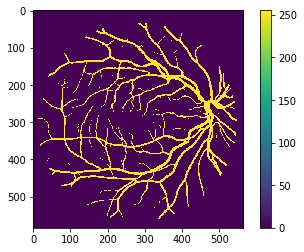

In [21]:
img = Image.open(os.path.join(module_path, 'data/predict/2.png'))
plt.imshow(img)
plt.colorbar()
plt.show()

In [20]:
device = ('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
torch.cuda.get_device_capability(device)

In [ ]:
torch.cuda.max_memory_allocated(device=device)/1024/1024